In [ ]:
# from src.halo_mass_function import HaloMassFunction
# from src.halo_merger_rate import HaloMergerRateDensity
# from src.bh_merger_rate import BHMergerRateDensity
# from src.sgwb import SGWBEnergyDensity
# from src.bh_halo_interp import BHhaloInterp
# # from src.bh_merger_rate_traditional import BHMergerRateDensityTrad

# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm

### Fits of black hole - halo mass relation

In [1]:
from src.bh_halo_interp import BHhaloInterp
import numpy as np
from matplotlib import pyplot as plt
from halo_mass_hist import HaloMassHistory
from src.halo_mass_function import HaloMassFunction

mapping_interp_extended = BHhaloInterp()

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.


In [8]:
# -----------
# Emerical Relations
# -----------

# https://arxiv.org/abs/2001.02230
param_mean  = np.array([11.79, 0.20, 0.046, -0.38, 0.709, -0.18, 0.043, 0.96])
def stellar_mass_from_halo_mass(M_h, z, B, mu, C, nu, D, eta, F, E):
    M_A   = 10**(B + z*mu)
    A     = C * (1 + z)**nu
    gamma = D * (1 + z)**eta
    beta  = F*z + E
    M_star = M_h * 2*A / ((M_h/M_A)**(-beta) + (M_h/M_A)**gamma)
    return M_star

# https://arxiv.org/pdf/1508.06274
def black_hole_mass_from_stellar_mass(M_star):
    return 10**(8.95 + 1.40 * np.log10(M_star / 1e11))

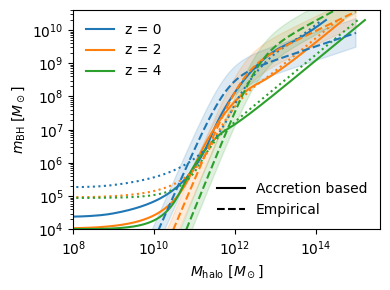

In [9]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyles = ['-', ':', '-.']

# Mesh for BH masses
mass1 = np.logspace(4., 10.3, 500)  # in solar masses
m1_grid, m2_grid = np.meshgrid(mass1, mass1)

mSeed = [1e4, 1e5]
redshifts = [0, 2, 4]

fig, ax = plt.subplots(figsize=(4,3))
for j, m in enumerate(mSeed):
    for i, z in enumerate(redshifts):
        halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = m)
        plt.loglog(halo_mass_estimated[0], m1_grid[0], linestyle = linestyles[j], color = colors[i]) #label = f"z = {z}", color = colors[i])

for i, z_final in enumerate(redshifts):
    halo_masses_now = np.logspace(9, 15, 100) 
    stellar_masses = stellar_mass_from_halo_mass(halo_masses_now, z_final, *param_mean)
    # Calculate black hole masses from stellar masses
    bh_masses = black_hole_mass_from_stellar_mass(stellar_masses)

    sigma_int = 0.43   # dex
    # intrinsic ±1 sigma envelope
    bh_up   = bh_masses * (10**sigma_int)
    bh_down = bh_masses * (10**(-sigma_int))

    plt.loglog(halo_masses_now, bh_masses, color = colors[i], linestyle = '--')
    plt.fill_between(halo_masses_now, bh_down, bh_up, color=colors[i], alpha=0.15)

# ----- Two legends -----
from matplotlib.lines import Line2D
leg1 = ax.legend(['z = 0', 'z = 2', 'z = 4'], frameon=False, loc='upper left')

# second legend
ax.add_artist(leg1)

# proxy artists for the linestyles
linestyle_proxies = [
    Line2D([0], [0], color='black', linestyle='-',  label='Accretion based'),
    Line2D([0], [0], color='black', linestyle='--', label='Empirical'),
]

ax.legend(handles=linestyle_proxies, frameon=False, loc='lower right')

plt.xlim(1e8, )
plt.ylim(1e4, 4e10)
plt.ylabel("$m_{\\rm BH} \\ [M_\\odot$]")
plt.xlabel("$M_{\\rm halo} \\ [M_\\odot$]")
# plt.grid(True, ls="-.", alpha = 0.5)
plt.tight_layout()
# plt.show()
plt.savefig('Figures/BH-halo-mass-relation.pdf')

### $dM/dm$ 

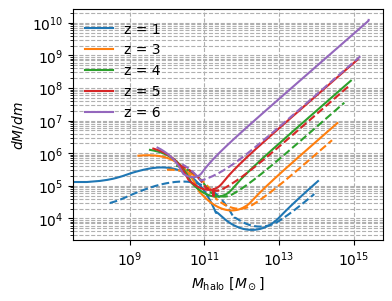

In [10]:
col = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd2']


plt.figure(figsize = (4,3))
mass1 = np.logspace(4, 11, 500)  # in solar masses
for i, z in enumerate([1, 3, 4, 5, 6]):
    mseed = 1e4
    mass1 = np.logspace(np.log10(mseed) + 0.1, 10, 500)  # in solar masses
    m1_grid, m2_grid = np.meshgrid(mass1, mass1)
    halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = mseed)
    slopes = mapping_interp_extended.dM_dm(m1_grid, z_final= z, m_seed = mseed)
    plt.loglog(halo_mass_estimated[10], slopes[10],  label = f"z = {z}", color = col[i])

    mseed = 1e5
    mass1 = np.logspace(np.log10(mseed) + 0.1, 10, 500)  # in solar masses
    m1_grid, m2_grid = np.meshgrid(mass1, mass1)
    halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = mseed)
    slopes = mapping_interp_extended.dM_dm(m1_grid, z_final= z, m_seed = mseed)
    plt.loglog(halo_mass_estimated[10], slopes[10],  linestyle = '--', color = col[i])

plt.ylabel("$dM/dm$")
plt.xlabel("$M_{\\rm halo} \\ [M_\\odot$]")

plt.grid(True, which="both", ls="--")
plt.legend(frameon = False)
plt.show()

# halo_mass_estimated[0]

### How to calculate halo mass history

In [ ]:
from src.halo_mass_history import HaloMassHistory
halo_mass = 1.9e9
z_seed = 10
z_final = 5
hmf_0 = HaloMassFunction(0)
mass_history_model = HaloMassHistory(halo_mass, z_seed, hmf_0)
print(f'A halo of mass M_h = {halo_mass:.2e} Msun at z = {z_seed} evolves to a halo of mass M_h = {mass_history_model.mass_at_z_from_zi(z_final):.2e} Msun at z = {z_final}')

### SMBH merger rate density

In [11]:
from src.bh_merger_rate import BHMergerRateDensity
from src.sgwb import SGWBEnergyDensity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for progress bar in loops
from tqdm.notebook import tqdm

In [ ]:
# BHMergerRateDensity.clear_cache()
# BHhaloInterp.clear_cache()

Using previous instance of BHMergerRateDensity; skipping precompute. 
Use BHMergerRateDensity.clear_cache() to recompute - will take 10–20 mins.


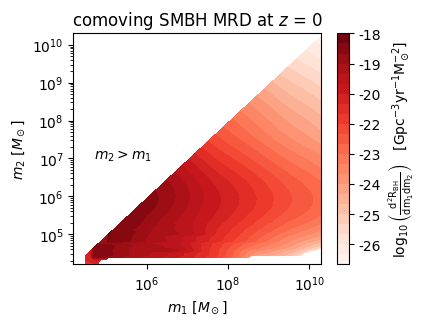

At z = 0, Total merger rate R_BH = 1.9e-05 yr^-1 Gpc^-3


In [16]:
z = 1e-2
import matplotlib.colors as colors

# black hole masses 
mass1 = np.logspace(4.2, 10.3, 100)  # Msun
mass2 = np.logspace(4.2, 10.3, 100)  # Msun
m1_grid, m2_grid = np.meshgrid(mass1, mass2)
mu_val = 8.7

bh_merger_rate_density = BHMergerRateDensity(z, m1_grid, m2_grid)
current_t = bh_merger_rate_density.cosmic_time(z)  # in yr
R_BH = bh_merger_rate_density.compute_R_BH(m1_grid, m2_grid, mu_val, current_t)

plt.figure(figsize=(4, 3), dpi = 100)

# Careful, this is to prevent error msg for the log10(0) but it might suppress other errors too
with np.errstate(divide='ignore', invalid='ignore'):
    R_BH_log = np.log10(R_BH * 1e9)

contour = plt.contourf(m1_grid, m2_grid, R_BH_log, levels=25, cmap='Reds')

plt.xscale('log')
plt.yscale('log')

plt.colorbar(contour, format='%.0f', label=r'$\log_{10} \left( \frac{\rm {d}^2 R_{\rm {BH}}}{\rm {d}m_1 \rm {d}m_2} \right) \quad [\rm{Gpc}^{-3} \rm{yr}^{-1} M_\odot^{-2}]$')
plt.xlabel(r'$m_1 \ [M_\odot]$')
plt.ylabel(r'$m_2 \ [M_\odot]$')
plt.title(f'comoving SMBH MRD at $z$ = {z:.0f}')
plt.text(5e4, 1e7, '$m_2 > m_1$')
plt.show()

# Integrate over m1 for each m2
integral_m1 = np.trapezoid(R_BH * 1e9, x=mass1, axis=1)  # Integrate over m1 for each m2
# Integrate the result over m2
Rh_BH_summed = np.trapezoid(integral_m1, x=mass2)  # Integrate over m2
print(f"At z = {z:.0f}, Total merger rate R_BH = {Rh_BH_summed :.1e} yr^-1 Gpc^-3")

### source frame SMBH merger rate (in comoving coordiantes)

Using previous instance of BHMergerRateDensity; skipping precompute. 
Use BHMergerRateDensity.clear_cache() to recompute - will take 10–20 mins.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

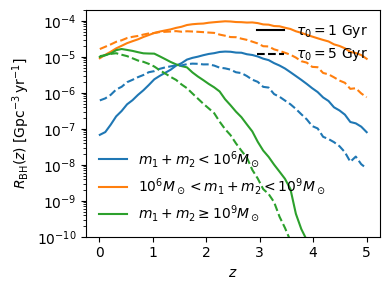

In [15]:
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set up redshift and mass grids
z_values = np.linspace(1e-2, 5, 50)
m1 = np.logspace(4.2, 10.3, 100)  # Msun
m2 = np.logspace(4.2, 10.3, 100)  # Msun
m1_grid, m2_grid = np.meshgrid(m1, m2)
total_mass = m1_grid + m2_grid

# Masks
mask_low    = total_mass < 1e6
mask_mid    = (total_mass >= 1e6) & (total_mass < 1e9)
mask_high   = total_mass >= 1e9

R_low  = np.zeros_like(z_values)
R_mid  = np.zeros_like(z_values)
R_high = np.zeros_like(z_values)

tau0_vals = [1, 5]
lstyles  = ['-', '--']

# Needed to calculate t from z below (defined outside the loop to save unnecessary object initialisation)
bhmrd = BHMergerRateDensity(0, m1_grid, m2_grid)

mu_val = 8.7

fig, ax = plt.subplots(figsize=(4,3))
for j in [0,1]: # j loops over the two values of tau0
    for i, z in enumerate(tqdm(z_values)):
        t = bhmrd.cosmic_time(z)  # current cosmic time in years
        R_grid = bhmrd.compute_R_BH(m1_grid, m2_grid, mu_val, t, tau0 = tau0_vals[j], sigma_tau=0.5)
        
        # zero out R wherever outside mask
        R1 = R_grid * mask_low
        R2 = R_grid * mask_mid
        R3 = R_grid * mask_high

        # integrate each in m1 then m2
        int_m1_1 = np.trapezoid(R1, x=m1, axis=1)
        int_m1_2 = np.trapezoid(R2, x=m1, axis=1)
        int_m1_3 = np.trapezoid(R3, x=m1, axis=1)

        R_low[i]  = np.trapezoid(int_m1_1, x=m2)
        R_mid[i]  = np.trapezoid(int_m1_2, x=m2)
        R_high[i] = np.trapezoid(int_m1_3, x=m2)

    
    ax.plot(z_values, R_low   * 1e9,  color=col[0], linestyle = lstyles[j])
    ax.plot(z_values, R_mid   * 1e9,  color=col[1], linestyle = lstyles[j])
    ax.plot(z_values, R_high  * 1e9,  color=col[2], linestyle = lstyles[j])


# ----- Two legends -----
from matplotlib.lines import Line2D
first_legend = ax.legend([r'$m_1 + m_2 < 10^6  M_\odot$', r'$10^6  M_\odot < m_1  + m_2 < 10^9  M_\odot$', r'$m_1 + m_2 \geq 10^9  M_\odot$'], loc='lower left', frameon = False) 
ax.add_artist(first_legend)

# --- Create second legend ---
solid_legend = Line2D([0], [0], color='k', markerfacecolor='k', label= r'$\tau_0 = 1$ Gyr')
dashed_legend = Line2D([0], [0],  color='k', markerfacecolor='k', label= r'$\tau_0 = 5$ Gyr', linestyle = '--')
second_legend = ax.legend(handles=[solid_legend, dashed_legend], loc='upper right', frameon = False) 

ax.set_yscale('log')
ax.set_ylim(1e-10, 5e-1)
ax.set_xlabel('$z$')
ax.set_ylabel(r'$R_{\rm BH}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
# ax.grid(ls='-.', alpha = 0.5)
ax.set_ylim(None, 2e-4)
plt.tight_layout()
plt.savefig('Figures/BH_merger_rates.pdf')
plt.show()


### Stochastic gravitational wave backgroud energy density (normalized with critical density)

Using previous instance of BHMergerRateDensity; skipping precompute. 
Use BHMergerRateDensity.clear_cache() to recompute - will take 10–20 mins.


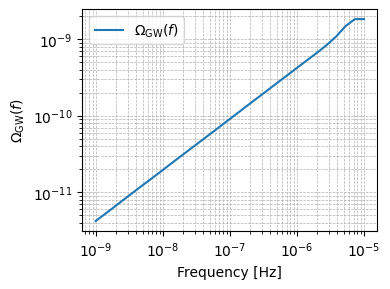

In [17]:
# frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-5   # Hz
num_f = 30 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# maximum redshift for integration
z_max = 6 # can go higher but not needed (plus saves from interpolation issues)

# Define black hole masses m1 and m2 
mass1 = np.logspace(6, 9, 100)  # Msun
mass2 = np.logspace(6, 9, 100)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max, 8.7)


plt.figure(figsize=(4, 3))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import src.sensitivityCurves as sCurves
sc = sCurves.sensitivityCurves()
freq_violin, omega_violins, freq_PTA, omega_NANOGrav_15yr = sc.fetchData()

/Users/sohanghodla/Downloads/SMDs_PTA/src/sensitivityCurves.py:80: SyntaxWarning: invalid escape sequence '\O'
  """


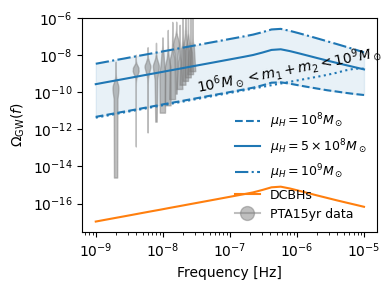

In [19]:

cols = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(4, 3))

nbh   = [8.0, 8.7, 9.0]
muH   = [r'$\mu_H = 10^8 M_\odot$',
         r'$\mu_H = 5 \times 10^8 M_\odot$',
         r'$\mu_H = 10^9 M_\odot$']
scale = 2.25
file  = 'outputsForPlots/Omega_GW_data_mu'

band = {}
lstyles = ['--', '-', '-.']

for i, num_den in enumerate(nbh):
    df = pd.read_csv(f'{file}{num_den}.csv')
    f_vals     = df['Frequency [Hz]']
    Omega_vals = scale * df[' Omega_GW(f)']
    
    plt.loglog(f_vals, Omega_vals, label=muH[i], color=cols[0], linestyle = lstyles[i])
    
    # save for the band
    if num_den in (8.0, 9.0):
        band[num_den] = (f_vals, Omega_vals)


# for DCBH
df = pd.read_csv(f'{file}8.7.csv')
f_vals     = df['Frequency [Hz]']
Omega_vals = (1e-6/5e-3)**2 * scale * df[' Omega_GW(f)']

plt.loglog(f_vals, Omega_vals, color=cols[1], linestyle = '-', label = 'DCBHs')


# for low masses values
Omega_GW_vals_low_mass = np.array([4.21064038e-12, 5.19241346e-12, 6.40588205e-12, 7.96197928e-12,
       9.80615463e-12, 1.21100407e-11, 1.50064901e-11, 1.85597667e-11,
       2.29038681e-11, 2.82784845e-11, 3.49459022e-11, 4.31855251e-11,
       5.33844191e-11, 6.62778367e-11, 8.13868912e-11, 1.00297118e-10,
       1.24223104e-10, 1.53913028e-10, 1.90501195e-10, 2.34760731e-10,
       2.89211144e-10, 3.59634158e-10, 4.42837614e-10, 5.48885494e-10,
       6.76752706e-10, 8.41500101e-10, 1.08748637e-09, 1.46986110e-09,
       1.82353763e-09, 1.83057054e-09])


plt.loglog(f_vals, Omega_GW_vals_low_mass, color=cols[0], linestyle = ':')
plt.text(3e-8, 9e-11, r'$10^6 M_\odot < m_1  + m_2 < 10^9  M_\odot$', rotation = 11)

f_lo, Omega_lo = band[8.0]
f_hi, Omega_hi = band[9.0]

plt.fill_between(f_lo,  Omega_lo,  Omega_hi,  color=cols[0], alpha=0.1)

# violin plot
violin_parts = plt.violinplot(omega_violins.T, positions=freq_violin, 
                              widths=(freq_violin)*0.2, showextrema=False)
# color of each violin
for body in violin_parts['bodies']:
    body.set_facecolor('gray')  
    body.set_edgecolor('gray') 
    body.set_alpha(0.5) 

# Add label 
from matplotlib.lines import Line2D
# circle legend for violin plot
circle_legend = Line2D([0], [0], marker='o', color='gray', 
            markerfacecolor='gray', markersize=10, alpha=0.5, label='Violin Plot for PTA-15yr data')
# existing handles 
handles, labels = plt.gca().get_legend_handles_labels()
# Add circle legend handle
handles.append(circle_legend)
labels.append('PTA15yr data')

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
# plt.grid(True, which="major", ls="-.", linewidth=0.5)
plt.ylim(None, 1e-6)
plt.legend(handles=handles, labels=labels, frameon = False, loc = 'lower right', ncol = 1, fontsize = 9)
plt.tight_layout()
plt.savefig('Figures/SMBH_energy_density.pdf')

### Auxilary function (incase needed)

In [ ]:
from scipy.integrate import quad
from src.cosmolopy import constants

# Manual implementation of cosmic time as a function of redshift
def cosmic_time(z):
    """
    Calculate cosmic time at redshift z.

    Parameters:
    - z: Redshift

    Returns:
    - t: Cosmic time in years
    """
    h = 0.674  # Hubble parameter 
    H0 = h * 100 / constants.Mpc_km * constants.yr_s # Hubble constant yr^-1
    omega_m0 = 0.315
    omega_l0 = 0.685

    # Function E(z)
    def E(zp):
        return np.sqrt(omega_l0 +
        (1.0 - omega_l0 - omega_m0) * (1.0 + zp)**2 +
        omega_m0 * (1.0 + zp)**3 )

    # Integrate 
    integrand = lambda zp: 1 / ((1 + zp) * E(zp))
    integral, error = quad(integrand, z, np.inf) # # Integrate from z to a very high redshift ~ infinity
    t = integral / H0 
    return t  # in yrs

z = 10**0.95
print(f"Comoving time at z = {z:.1f} is {cosmic_time(z):.1e} yr")

In [ ]:
from scipy.stats import lognorm
from scipy.interpolate import interp1d
import numpy as np
def p_merg(tau0=1.0, sigma=0.5):
        """
        Returns a 1/yr PDF for the delay-time \tau (in Gyr) between halo merger
        and BH merger, assuming a log-normal distribution whose *mean* is tau0.

        Parameters:
        -----------
        tau0 : float
            Mean merger delay time [Gyr].
        sigma : float
            Standard deviation of ln(\tau) (i.e. log-space scatter).
        
        Objective:
            creates self.p_merg_interp(\tau) with p(\tau) in [1/yr].
        """

        # numerical grid parameters
        tau_min = 1e-4           # avoid τ=0
        tau_max = 14.0           # upper end for grid (can be extended)
        num_pts = 1000

        # tau-grid (in Gyr)
        tau_grid = np.linspace(tau_min, tau_max, num_pts)

        # Compute the log-normal mu so that mean = tau0:
        #    E[tau] = exp(mu + 0.5*sigma^2) = tau0  ->  mu = ln(tau0) - 0.5*sigma^2
        mu = np.log(tau0) - 0.5 * sigma**2

        # evaluate the log-normal PDF [per Gyr]
        pdf_per_gyr = lognorm.pdf(
            tau_grid,
            s=sigma,
            scale=np.exp(mu),
        )

        # Convert to per-year
        pdf_per_year = pdf_per_gyr / 1e9

        # Interpolator
        p_merg_interp = interp1d(
            tau_grid,
            pdf_per_year,
            kind='linear',
            bounds_error=False,
            fill_value=0.0, # zero outside the grid
        )
        return p_merg_interp

In [ ]:
t = np.linspace(0, 14, 100)
p_merg_interp = p_merg()
plt.figure(figsize = (4,3))
plt.loglog(t, p_merg_interp(t))
# plt.yscale('log')